In [8]:
# @itsvenu_
# Self organizing maps - can be applied to patient/cell data stratification
# this notebook - credit card fraud detection

# unsupervised learning
# reducing dimensionality
# BMU - best matching unit for each row/observation

!pip install -q MiniSom

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [3]:
dat = pd.read_csv('../../data-dl/Credit_Card_Applications.csv')
dat.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
X = dat.iloc[:, :-1].values
Y = dat.iloc[:, -1].values

In [7]:
# feature scaling
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X[:5]

array([[0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ],
       [0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.08      , 0.        ],
       [0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ],
       [0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
        0.30769231, 0.25      , 0.        , 1.        , 1.        ,
        0.1641791 , 1.        , 0.5       , 0.        , 0.        ],
       [0.60079526, 1.        , 0.09654135, 0.29178571, 0.5       ,
        0.38461538, 0.375     , 0.06877193, 1.        , 1.        ,
        0.20895522, 0.        , 0.5       , 

In [12]:
# SOM
# 10 x 10 grid
som = MiniSom(x=10, y=10, input_len=15,
             sigma=1.0, learning_rate=0.5,
             random_seed=42)

In [13]:
# initialize weights
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

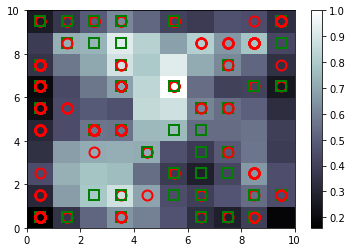

In [20]:
# viz
# Mean-Interneuron-distances

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markerfacecolor = 'None',
         markersize=10,
         markeredgewidth=2)
show()

# val close 1 -> potential fraud